
   
# Title: Wisconsin Breast Cancer Database (January 8, 1991)

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

### Relevant Information:

Samples arrive periodically as Dr. Wolberg reports his clinical cases.
The database therefore reflects this chronological grouping of the data.
This grouping information appears immediately below, having been removed from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)


#### Number of Instances: 699 (as of 15 July 1992)

#### Number of Attributes: 10 plus the class attribute

#### Attribute Information: (class attribute has been moved to last column)

         Attribute                        Domain

       1. Sample code number             id number
       2. Clump Thickness                1 - 10
       3. Uniformity of Cell Size        1 - 10
       4. Uniformity of Cell Shape       1 - 10
       5. Marginal Adhesion              1 - 10
       6. Single Epithelial Cell Size    1 - 10
       7. Bare Nuclei                    1 - 10
       8. Bland Chromatin                1 - 10
       9. Normal Nucleoli                1 - 10
      10. Mitoses                        1 - 10
      11. Class:                        (2 for benign, 4 for malignant)

#### Missing attribute values: 16

There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?".  
#### Class distribution:
 
    Benign: 458 (65.5%)
    Malignant: 241 (34.5%)

### Import required libraries

In [1]:
# For dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Processing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as sch

### Breast Cancer Wisconsin (Original) Data Set from the UCI Machine Learning Repository

In [2]:
# chargement des données
dataset = pd.read_table('breast-cancer-wisconsin.data', sep = ',')

In [3]:
df = dataset.copy()

The dataset must have 699 lines et 11 columns

In [4]:
df.index #Describe index

RangeIndex(start=0, stop=698, step=1)

In [5]:
df.shape #(rows,columns)

(698, 11)

In [6]:
# Rename columns
df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses', 'Class']

In [7]:
df.columns #Describe DataFrame columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
df.count() #Number of non-NA values

Sample code number             698
Clump Thickness                698
Uniformity of Cell Size        698
Uniformity of Cell Shape       698
Marginal Adhesion              698
Single Epithelial Cell Size    698
Bare Nuclei                    698
Bland Chromatin                698
Normal Nucleoli                698
Mitoses                        698
Class                          698
dtype: int64

# Feature Engineering

In [9]:
MissingValues = {col:df[df[col] == "?"].shape[0] for col in df.columns}
MissingValues

{'Sample code number': 0,
 'Clump Thickness': 0,
 'Uniformity of Cell Size': 0,
 'Uniformity of Cell Shape': 0,
 'Marginal Adhesion': 0,
 'Single Epithelial Cell Size': 0,
 'Bare Nuclei': 16,
 'Bland Chromatin': 0,
 'Normal Nucleoli': 0,
 'Mitoses': 0,
 'Class': 0}

In [10]:
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        if(df.iloc[j,i]=='?'):
            df.iloc[j,i]=np.NaN

In [11]:
df = df.fillna(df.median())

In [12]:
df.isnull().sum() #Number of NA values

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Summary

In [13]:
df['Bare Nuclei'] = df['Bare Nuclei'].str.replace('%','').astype(np.float64)

In [14]:
df.info() #Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           698 non-null    int64  
 1   Clump Thickness              698 non-null    int64  
 2   Uniformity of Cell Size      698 non-null    int64  
 3   Uniformity of Cell Shape     698 non-null    int64  
 4   Marginal Adhesion            698 non-null    int64  
 5   Single Epithelial Cell Size  698 non-null    int64  
 6   Bare Nuclei                  682 non-null    float64
 7   Bland Chromatin              698 non-null    int64  
 8   Normal Nucleoli              698 non-null    int64  
 9   Mitoses                      698 non-null    int64  
 10  Class                        698 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


    # : number of functions in the data framework
    Column: Features header in the Dataframe
    Non-null Count: Counter of nonzero values for each Dataframe function
    Type: type of data stored for each function of the data frame

In [15]:
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [16]:
df.describe() #Statistical summary of DataFrame

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,682.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.548387,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.645226,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


    count: number of examples counted for the selected function
    mean: arithmetic mean for the selected function
    std: standard deviation for the selected function
    min: minimum value presented by the examples for the selected function
    25%: first quartile calculated on the examples for the selected function
    50%: second quartile calculated on the examples for the selected function
    75%: third quartile calculated on examples for selected feature
    max: maximum value presented by the examples for the selected function

# Visualizing the data

2    457
4    241
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

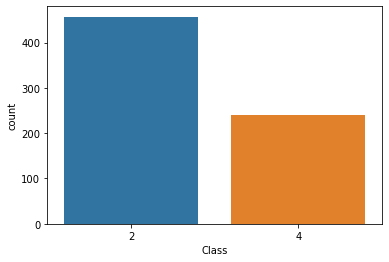

In [17]:
print(df['Class'].value_counts())
sns.countplot(x="Class", data=df)

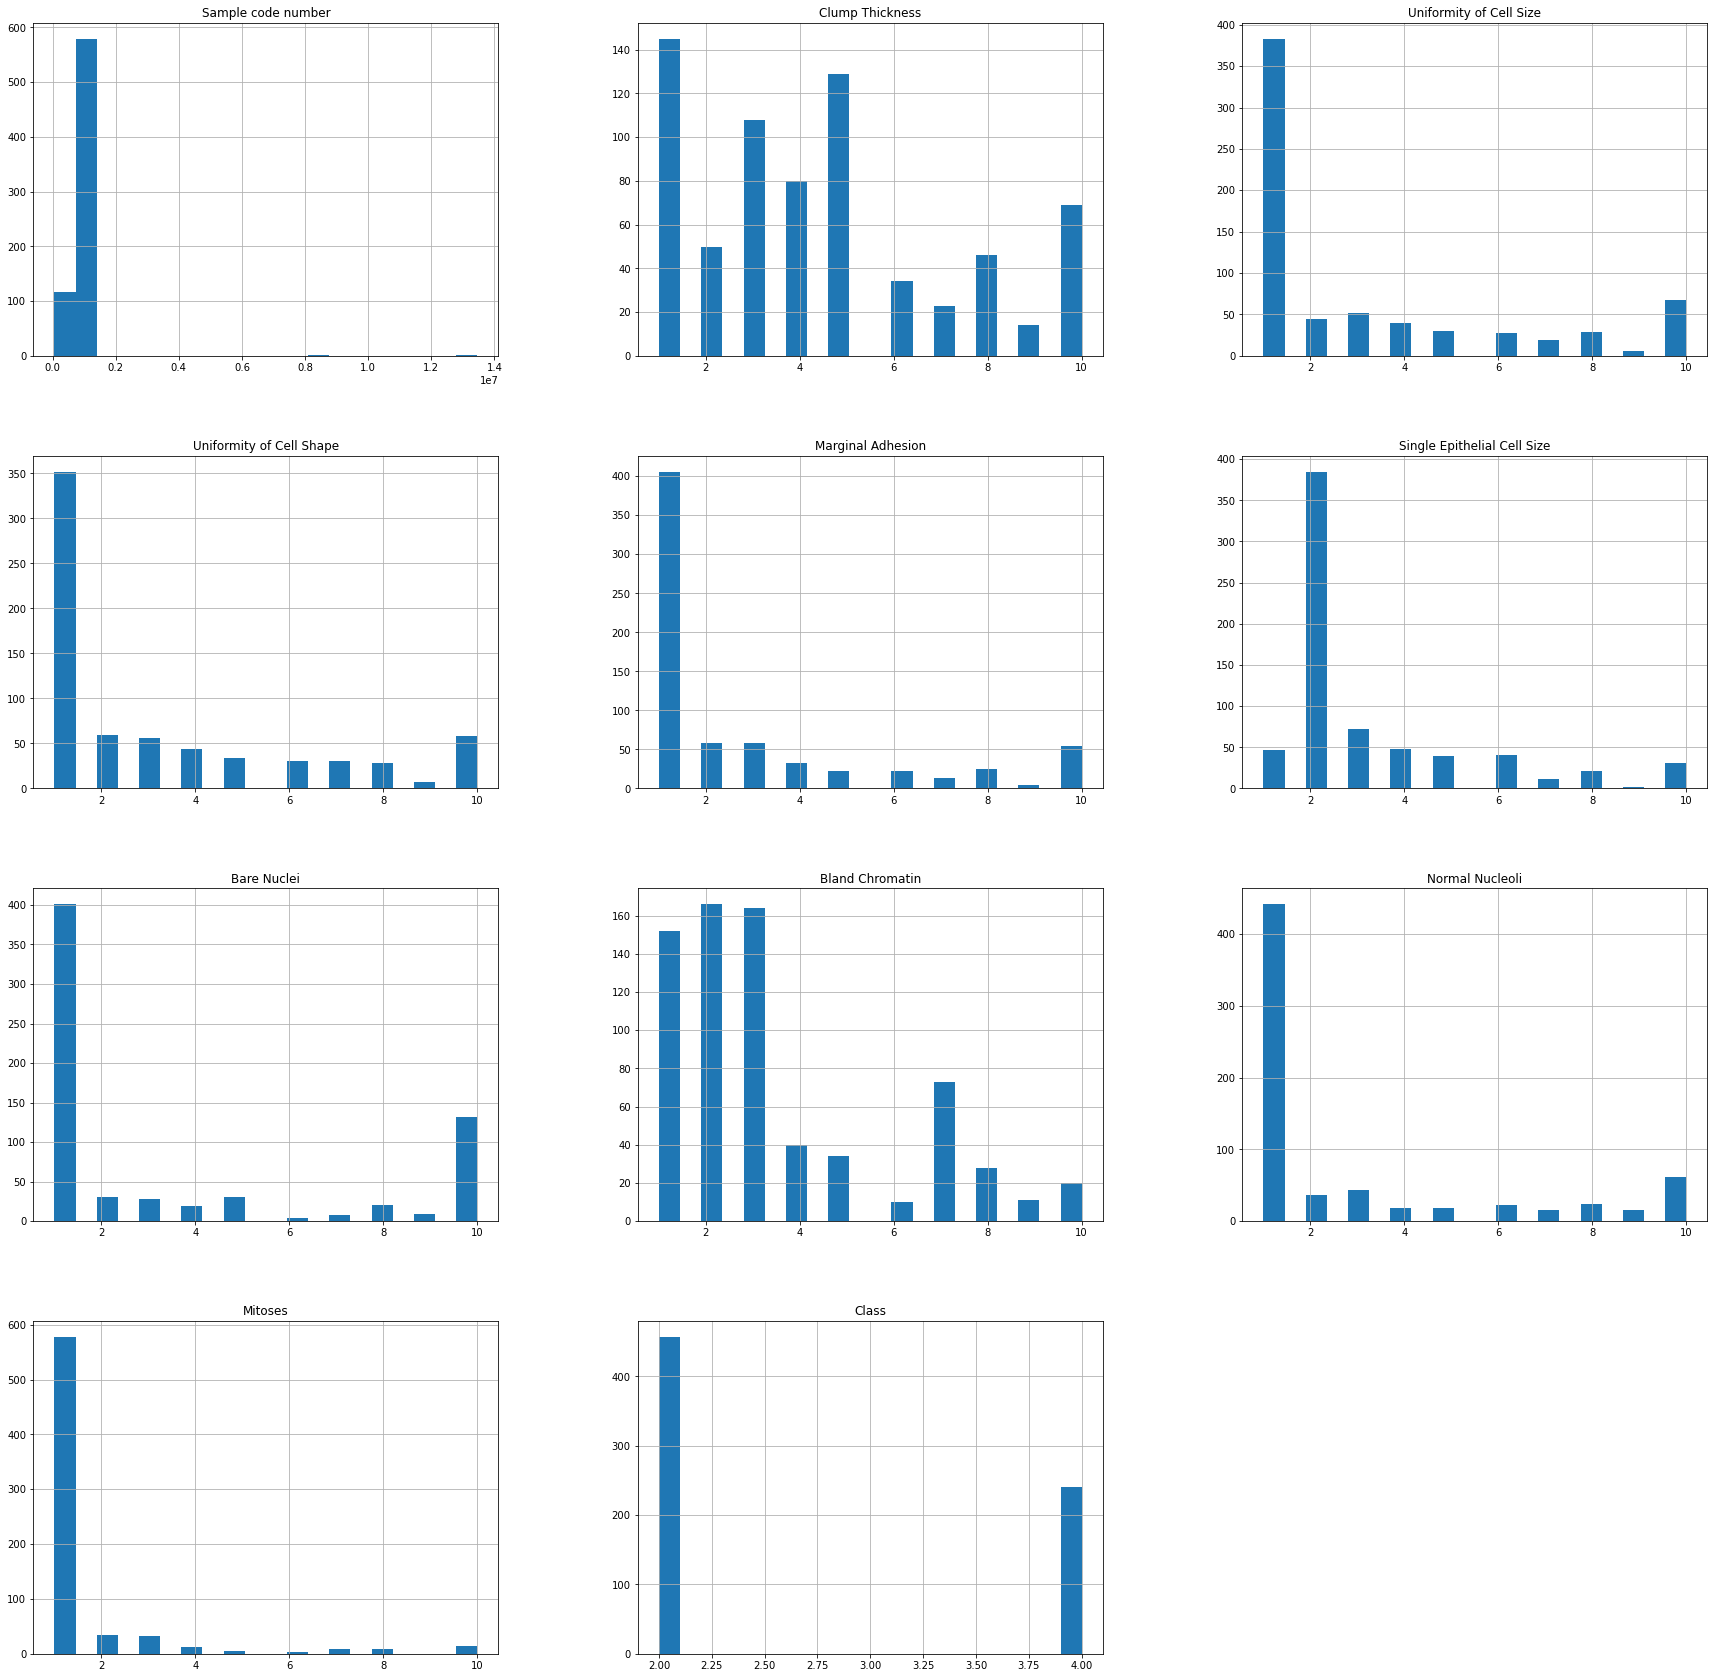

In [19]:
df.hist(bins=20, figsize=(30,30));

The data follows a normal distribution.

### Removre outliers

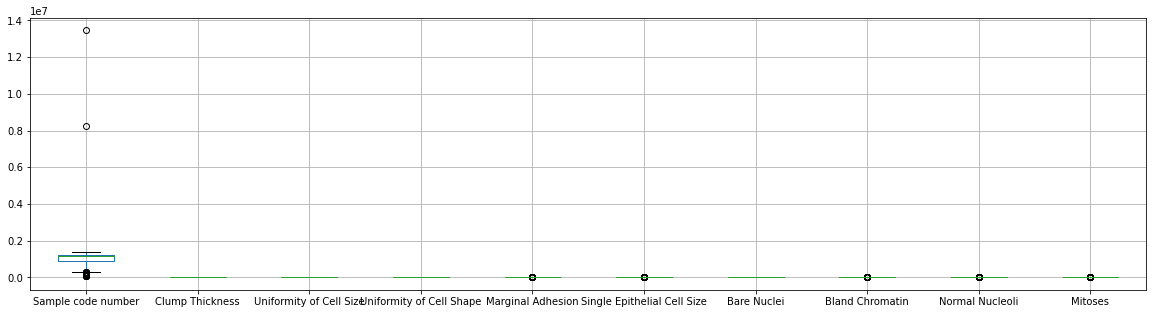

In [20]:
plt.figure(figsize=(20,5))
df.iloc[:,0:-1].boxplot()
plt.show()

In [21]:
for x in ['Sample code number']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [22]:
df.isnull().sum()

Sample code number             23
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.count() #Number of non-NA values

Sample code number             661
Clump Thickness                661
Uniformity of Cell Size        661
Uniformity of Cell Shape       661
Marginal Adhesion              661
Single Epithelial Cell Size    661
Bare Nuclei                    661
Bland Chromatin                661
Normal Nucleoli                661
Mitoses                        661
Class                          661
dtype: int64

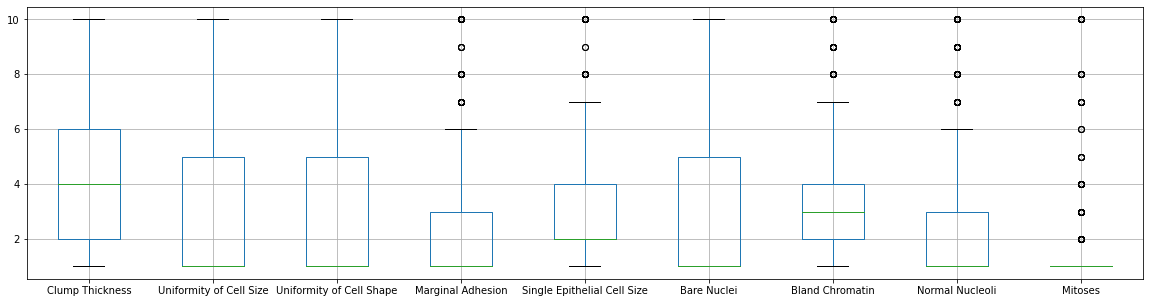

In [45]:
plt.figure(figsize=(20,5))
df.iloc[:,1:-1].boxplot()
plt.show()

<Figure size 432x432 with 0 Axes>

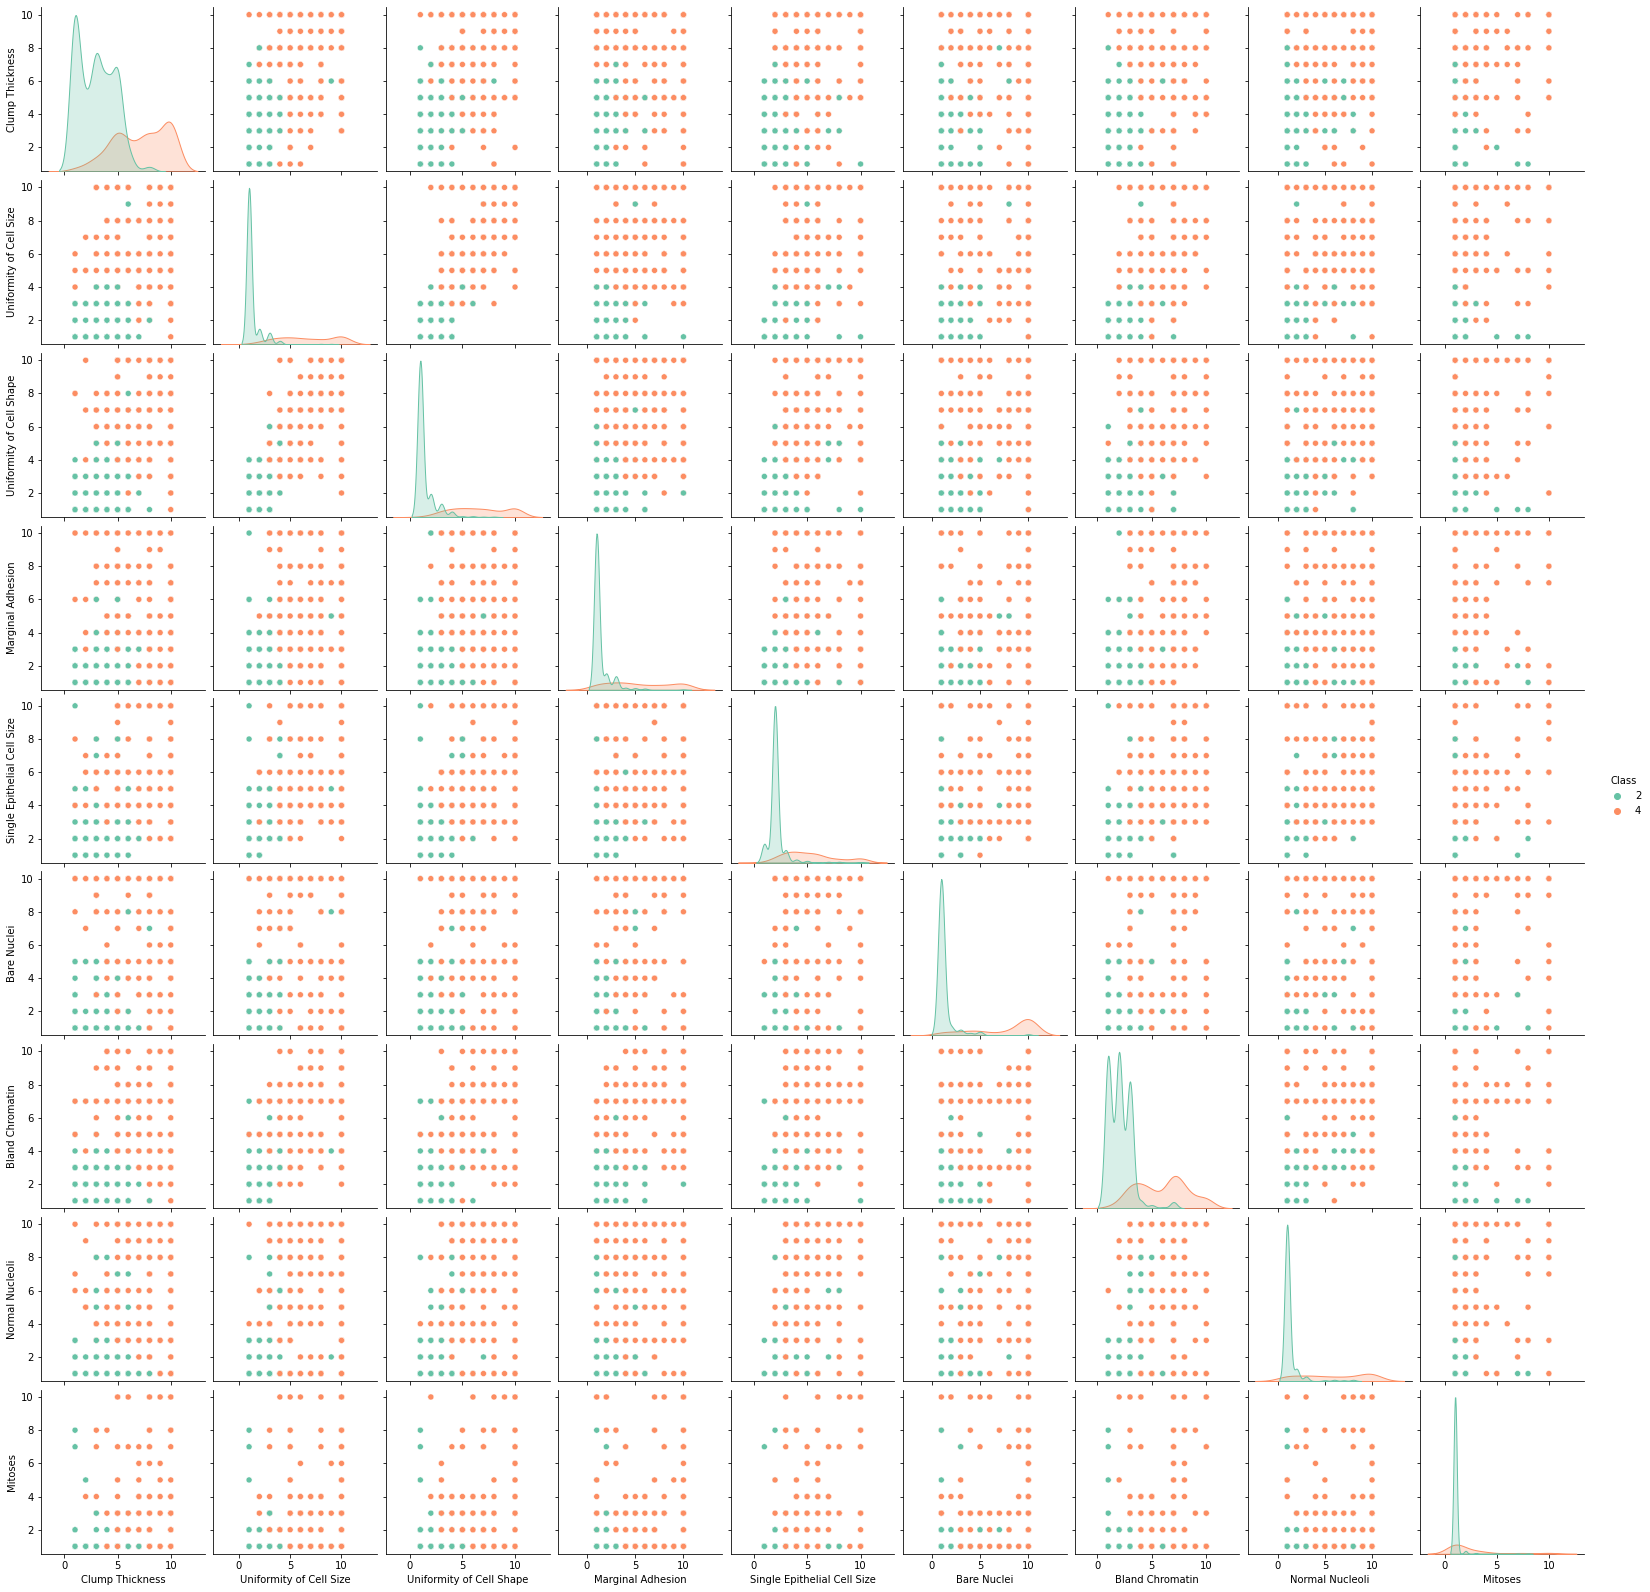

In [25]:
plt.figure(figsize=(6,6))
sns.pairplot(df.iloc[:,1:],hue='Class',palette='Set2')
plt.show()

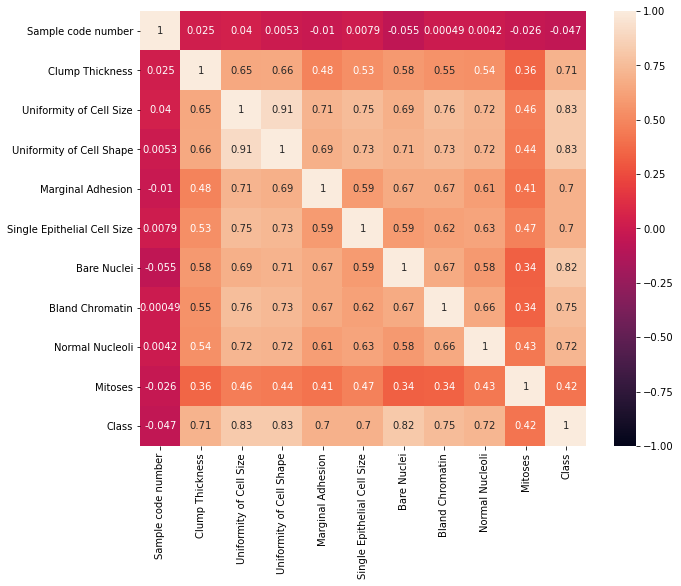

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmax=1.0,vmin=-1.0)
plt.show()

In order to perform a complete analysis, the correlation matrix takes into account the different characteristics present in the Dataframe.

The values present in the correlation matrix must be expressed as a decimal value in the range [-1,+1] indicating an inverse correlation or a direct correlation respectively.

When the calculated value of the correlation is close to the value 0, it is not possible to define the correlation between the characteristics considered.

The best correlation we identified are Clump Thickness, Uniformity of Cell Size and Uniformity of Cell Shape.
We will perform our comparison based on them.

<AxesSubplot:xlabel='Sample code number', ylabel='Clump Thickness'>

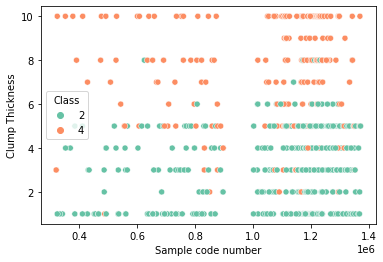

In [27]:
sns.scatterplot(x='Sample code number',y='Clump Thickness',data=df, hue='Class', palette='Set2')

# Preprare and pre-process the data

Due to the presence of data expressed with similar numerical range, normalization must be performed, we will be using the MinMaxScaler() method.

In [28]:
names = df.columns

# Data Normalization
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=names)

In [29]:
scaled_df1 = scaled_df.copy()
scaled_df2 = scaled_df.copy()

# Measuring method of clusters produced

Different Aspects of Cluster Validation:
    
    1. Determining the clustering tendency of a set of data, distinguishing whether non-random structure actually exists in the data.
    2. Determining the ‘correct’ number of clusters (Sum of Squared Error (SSE)).
    3. Comparing the results of two different sets of cluster analyses to determine which is better.
        - Intrinsic index is used for this function (SSE)
        - We will take a look at Clump Thickness, Uniformity of Cell Size and Uniformity of Cell Shape to 
          compare our clusters

### K-means

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

    - The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    - Each point is closer to its own cluster center than to other cluster centers.

#### Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

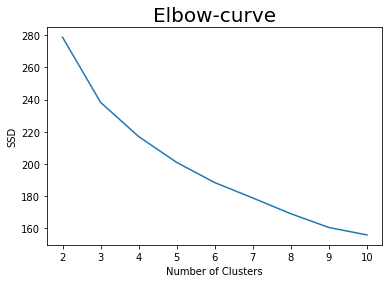

In [30]:
ssd = [] # squared distances 
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, max_iter=698)
    kmeans.fit(scaled_df1)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range(2, 11), ssd)
plt.title('Elbow-curve', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

The Elbow Curve is a fundamental to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [31]:
for i in range(2, 11):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(scaled_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6036294202851631
For n_clusters=3, the silhouette score is 0.5157670564861657
For n_clusters=4, the silhouette score is 0.3103309226953441
For n_clusters=5, the silhouette score is 0.30286391662528195
For n_clusters=6, the silhouette score is 0.30422354975648314
For n_clusters=7, the silhouette score is 0.3038379236099164
For n_clusters=8, the silhouette score is 0.2233218704616756
For n_clusters=9, the silhouette score is 0.21847812075812606
For n_clusters=10, the silhouette score is 0.2332305595656349


The silhouette coefficient varies between -1 (worst classification) and 1 (best classification).

In [32]:
# Final model with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df1)
y_kmeans = kmeans.predict(scaled_df1)

In [33]:
print(kmeans.inertia_)

238.24757322251247


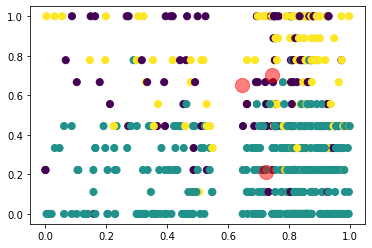

In [34]:
plt.scatter(scaled_df1.iloc[:, 0], scaled_df1.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [35]:
# assign the label
scaled_df1['Class'] = kmeans.labels_

<AxesSubplot:xlabel='Class', ylabel='Clump Thickness'>

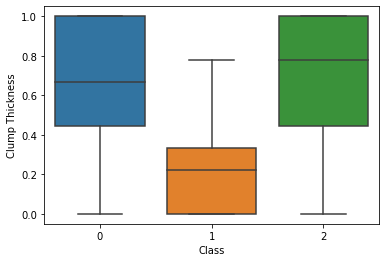

In [36]:
sns.boxplot(x=scaled_df1['Class'], y=scaled_df1['Clump Thickness'], data=scaled_df1)

<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Shape'>

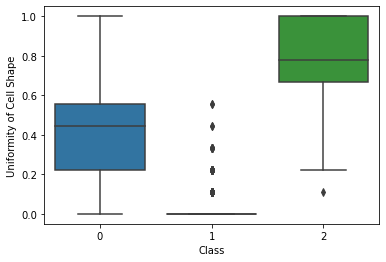

In [37]:
sns.boxplot(x=scaled_df1['Class'], y=scaled_df2['Uniformity of Cell Shape'], data=scaled_df1)

<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Size'>

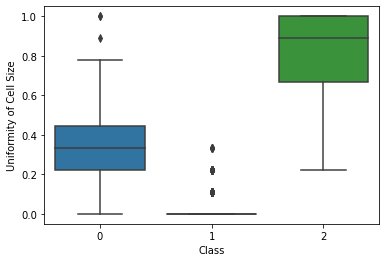

In [38]:
sns.boxplot(x=scaled_df1['Class'], y=scaled_df2['Uniformity of Cell Size'], data=scaled_df1)

### Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. In hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

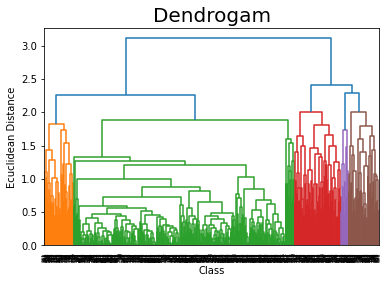

In [39]:
# Hierarchical clustering approaches linkage (single, complete, average)
mergings = linkage(scaled_df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Class')
plt.ylabel('Ecuclidean Distance')
plt.show()

We identifie 5 Cluster Labels with Hierarchical Clustering.

In [40]:
cluster_labels = cut_tree(mergings, n_clusters=6).reshape(-1, )
scaled_df2['Class'] = cluster_labels

<AxesSubplot:xlabel='Class', ylabel='Clump Thickness'>

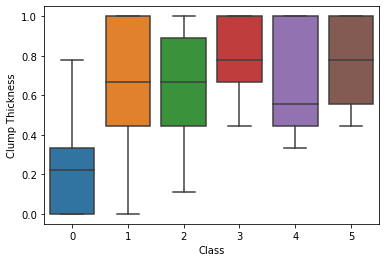

In [41]:
sns.boxplot(x=scaled_df2['Class'], y=scaled_df2['Clump Thickness'], data=scaled_df2)

<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Size'>

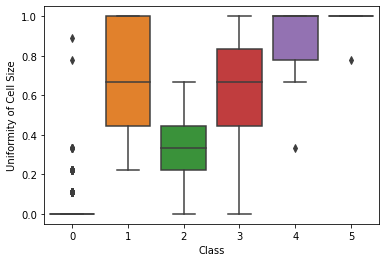

In [42]:
sns.boxplot(x=scaled_df2['Class'], y=scaled_df2['Uniformity of Cell Size'], data=scaled_df2)

<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Shape'>

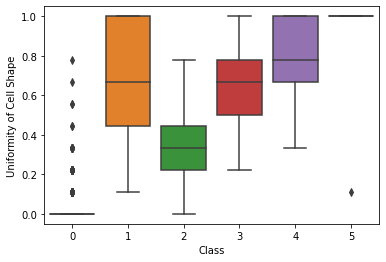

In [43]:
sns.boxplot(x=scaled_df2['Class'], y=scaled_df2['Uniformity of Cell Shape'], data=scaled_df2)

### Inference:
#### K-Means Clustering with 3 Cluster Ids
    Clump Thickness in class 0 is more diverse, even if the majority of clump thickness is around 4.
     In class 1 the Clump Thickness is fewer divers they are regrouping around 2, on the contrary for class 3 the Clump Thickness are more around 8. We can make the assumption that class 2 refers to the final stage of Breast Cancer and class 1 in the beginning, which to early diagnosis of Breast Cancer.
 
    However, the Class Uniformity of Cell Size and Shape are too divers between each classes to interpret.
    
#### Hierarchical Clustering with 5 Cluster Labels

    Class with Class 0 are the ratio of clump thickness with the least amount compared to other classes. The Hierarchical Clustering can differentiate 4 different class of clump thickness that are packed between 4 and 10.
    
    The Class Uniformity of Cell Size and Shape are too divers between each classes to interpret.
    